In [1]:
import joblib
from deltalake import DeltaTable
from prophet import Prophet
import pandas as pd
import os

# Carregar e processar o dataframe
print("Carregando dados da DeltaTable...")
df = DeltaTable('../lake/delta_table').to_pandas()
df = df.sort_values(by='interval_start_local')

def prepara_base_para_treino(df, freq, start, end, energy_type):
    """Prepara a base para treino agregando os dados pela frequência especificada."""
    df_agg = df.groupby(df['interval_start_local'].dt.to_period(freq))[energy_type].median().reset_index()
    df_agg.rename(columns={"interval_start_local": "ds", energy_type: "y"}, inplace=True)
    df_agg['ds'] = pd.to_datetime(df_agg['ds'].astype(str))
    df_filtered = df_agg[(df_agg["ds"] >= start) & (df_agg["ds"] <= end)]
    df_filtered.reset_index(drop=True, inplace=True)
    return df_filtered

def treina_e_salva_modelo(df_train, output_file):
    """Treina o modelo Prophet e salva em um arquivo."""
    print(f"Treinando modelo para {output_file}...")
    model = Prophet()
    model.fit(df_train)
    joblib.dump(model, output_file)
    return model

def carregar_modelo(model_path):
    """Carrega o modelo Prophet e realiza a previsão."""
    print(f"Carregando modelo de {model_path}...")
    model = joblib.load(model_path)
    return model

def prever(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Configurações de agregação e períodos de treino
frequencias = {
    "hora": {"freq": 'h', "start": "2024-09-01", "end": "2024-11-01", "periods": 24},
    "dia": {"freq": 'd', "start": "2019-01-01", "end": "2024-11-01", "periods": 365},
    "mes": {"freq": 'M', "start": "2019-01", "end": "2024-11", "periods": 2}
}

/home/almaviva/projetos/alecrim-fiap-tech-challenge-tres/env_tech_challenge/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Carregando dados da DeltaTable...


In [ ]:
energias = ['solar', 'wind',
       'geothermal', 'biomass', 'biogas', 'small_hydro', 'coal', 'nuclear',
       'natural_gas', 'large_hydro', 'batteries', 'imports', ]

for energy_type in energias:
    modelos = {}
    for periodo, config in frequencias.items():
        df_train = prepara_base_para_treino(df, config['freq'], config['start'], config['end'], energy_type)
        base_path_model = f"../ml_models/{energy_type}/"
        model_path = f"prophet_{periodo}.joblib"
        os.makedirs(base_path_model, exist_ok=True)
        modelos[periodo] = treina_e_salva_modelo(df_train, base_path_model + model_path)
        del df_train

del df

Carregando modelo de ../ml_models/solar/prophet_hora.joblib...
Plotando previsão para hora...


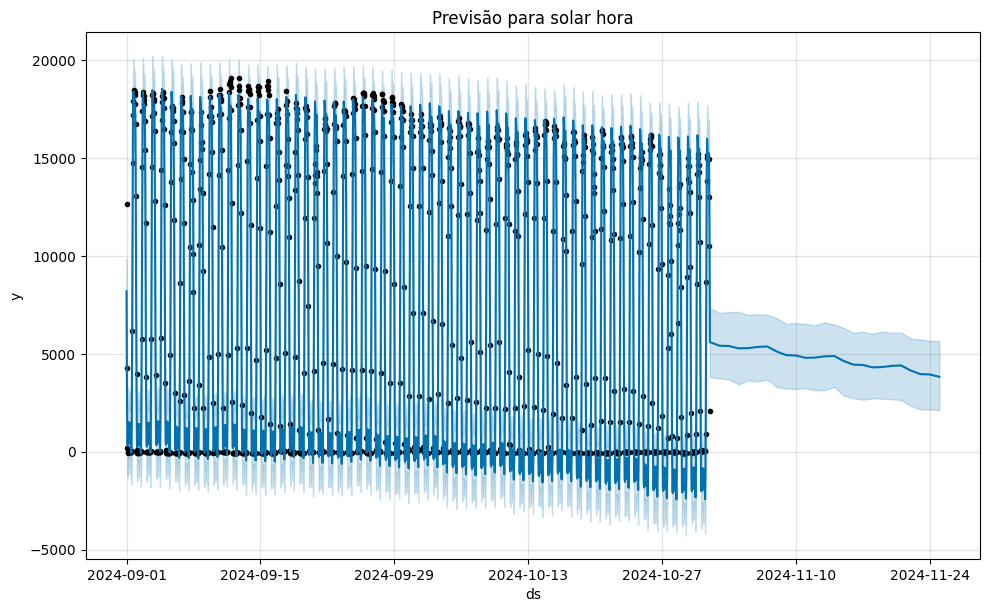

Carregando modelo de ../ml_models/solar/prophet_dia.joblib...
Plotando previsão para dia...


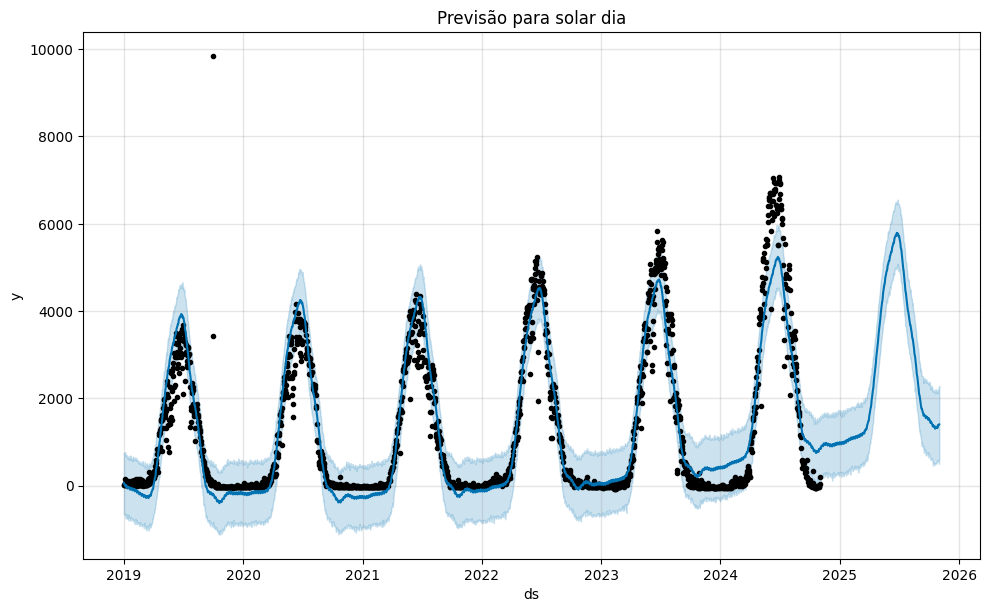

Carregando modelo de ../ml_models/solar/prophet_mes.joblib...
Plotando previsão para mes...


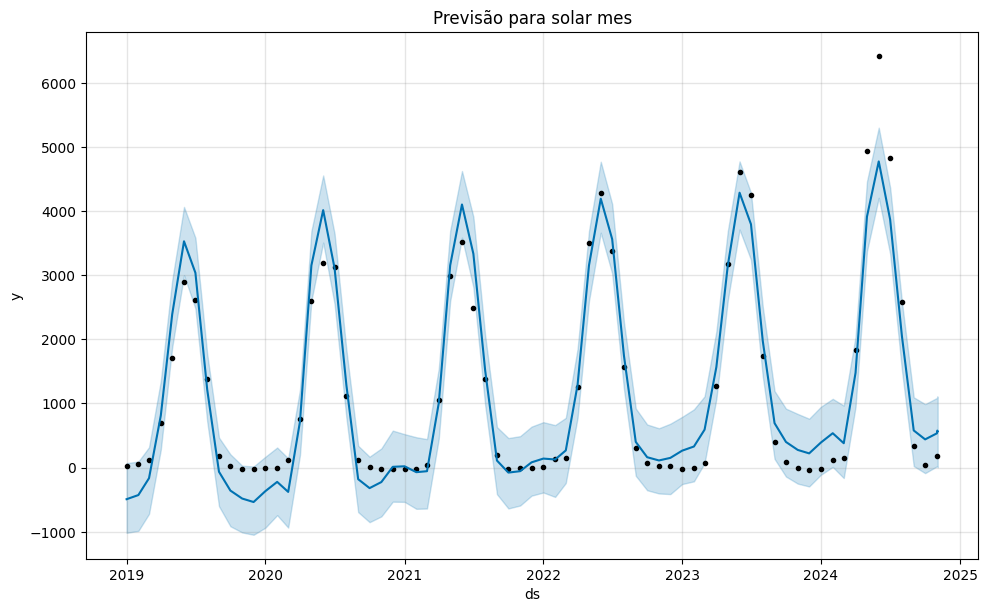

Carregando modelo de ../ml_models/wind/prophet_hora.joblib...
Plotando previsão para hora...


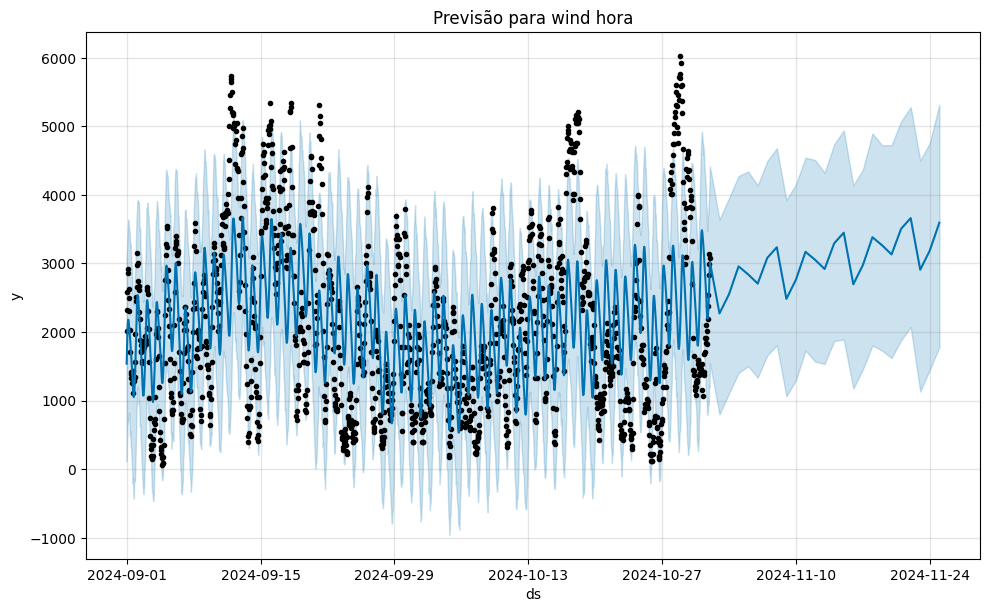

Carregando modelo de ../ml_models/wind/prophet_dia.joblib...
Plotando previsão para dia...


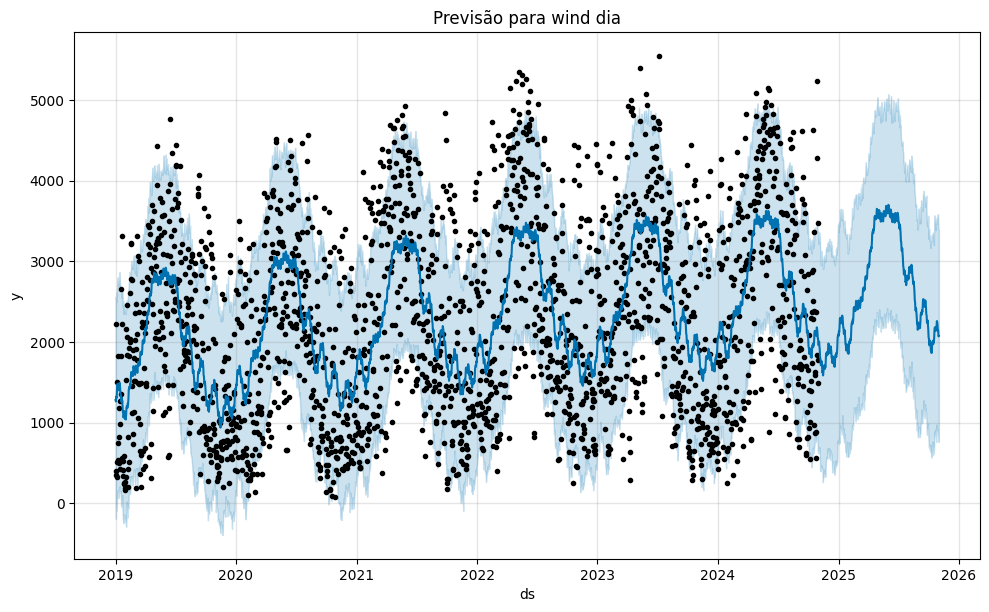

Carregando modelo de ../ml_models/wind/prophet_mes.joblib...
Plotando previsão para mes...


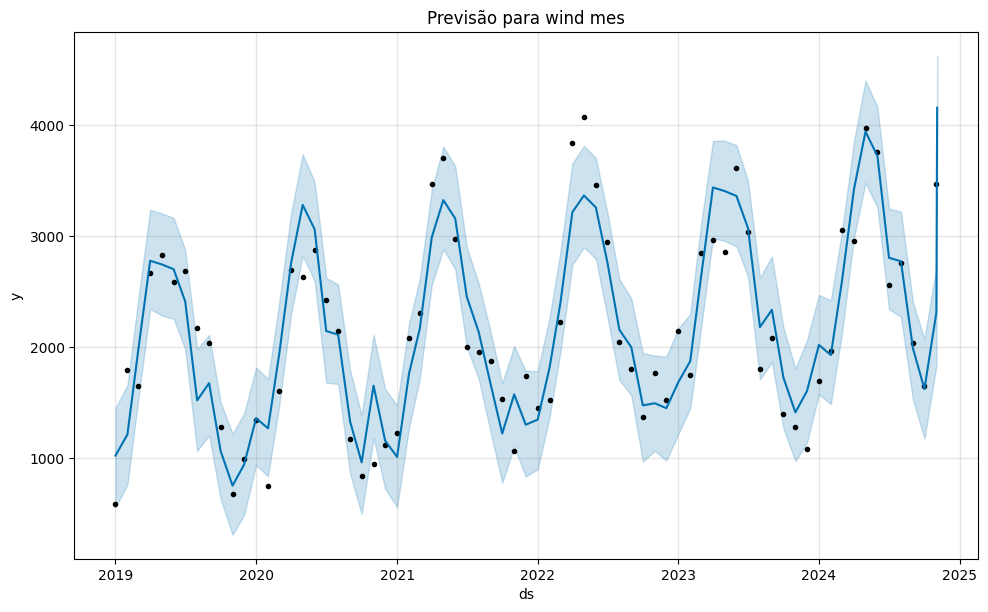

Carregando modelo de ../ml_models/geothermal/prophet_hora.joblib...
Plotando previsão para hora...


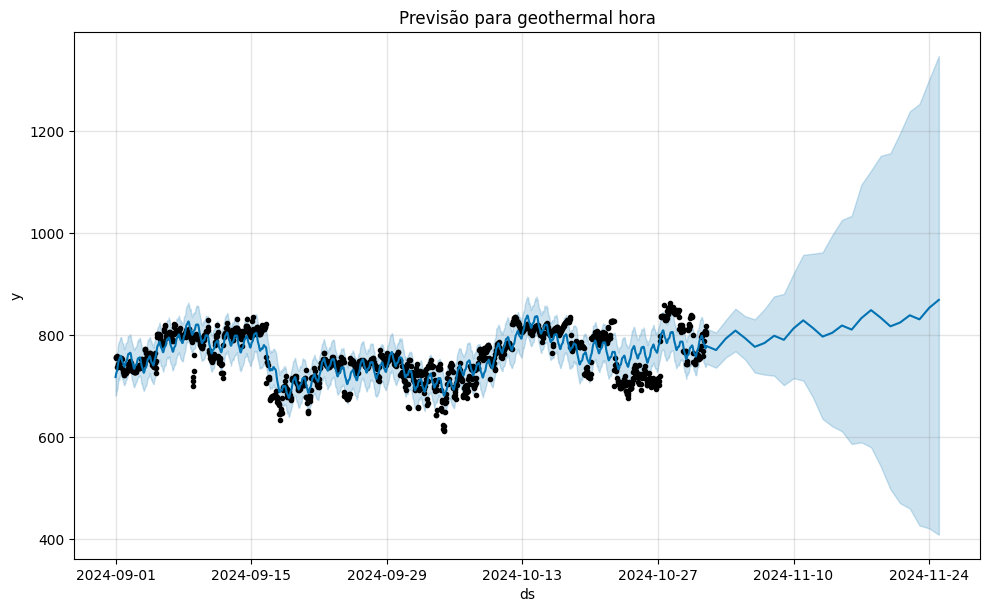

Carregando modelo de ../ml_models/geothermal/prophet_dia.joblib...
Plotando previsão para dia...


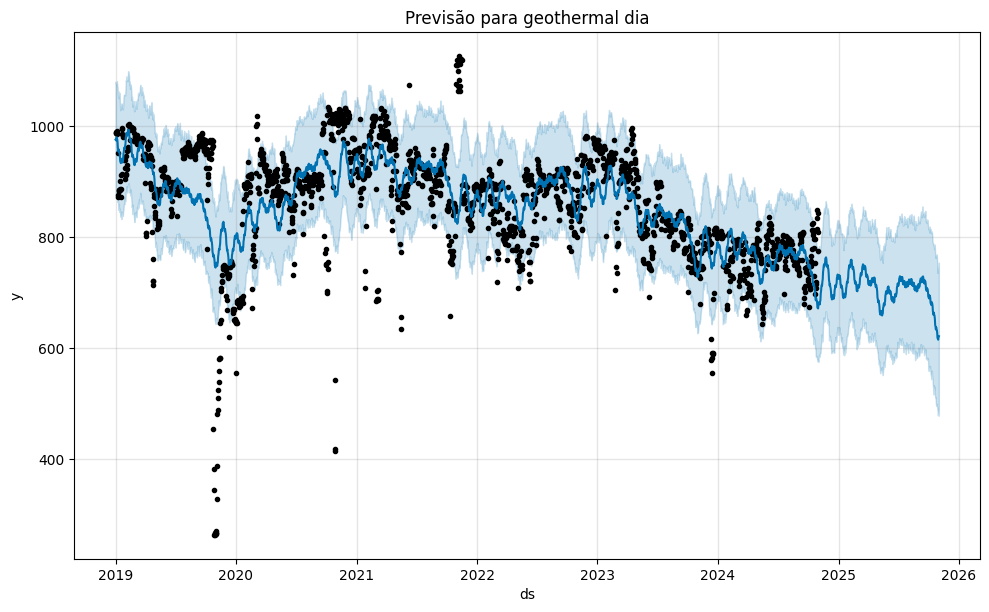

Carregando modelo de ../ml_models/geothermal/prophet_mes.joblib...
Plotando previsão para mes...


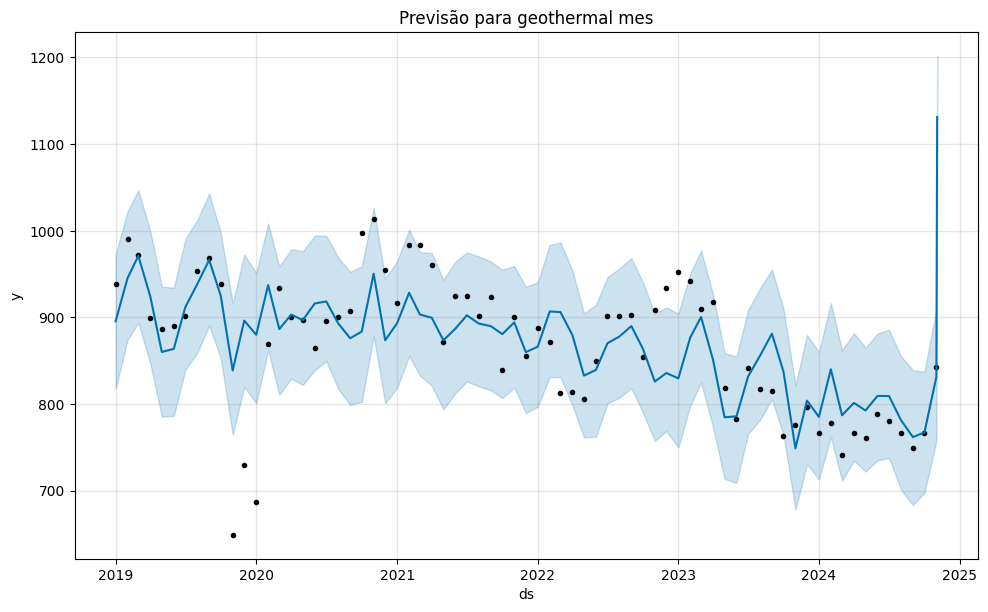

Carregando modelo de ../ml_models/biomass/prophet_hora.joblib...
Plotando previsão para hora...


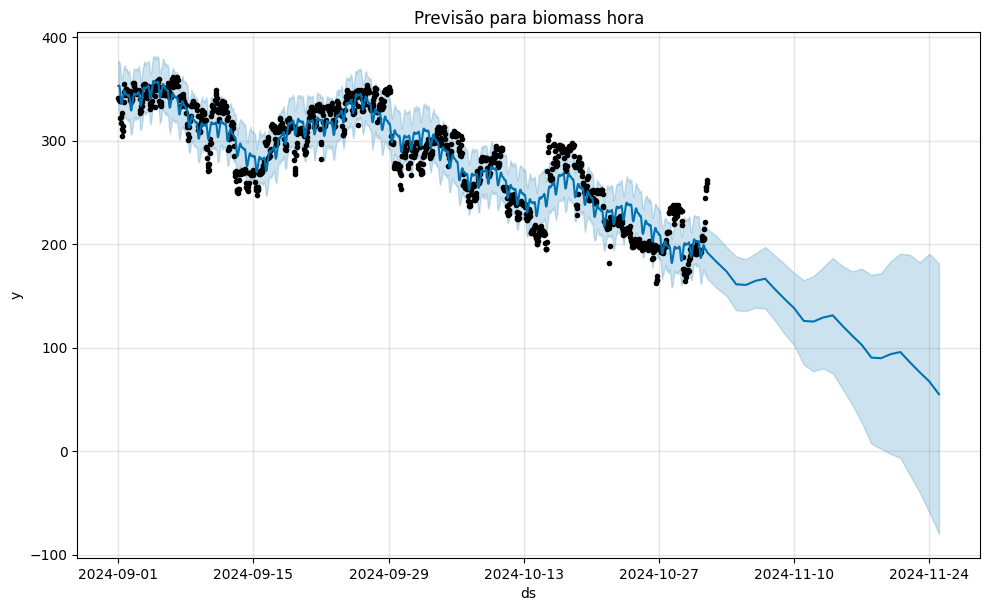

Carregando modelo de ../ml_models/biomass/prophet_dia.joblib...
Plotando previsão para dia...


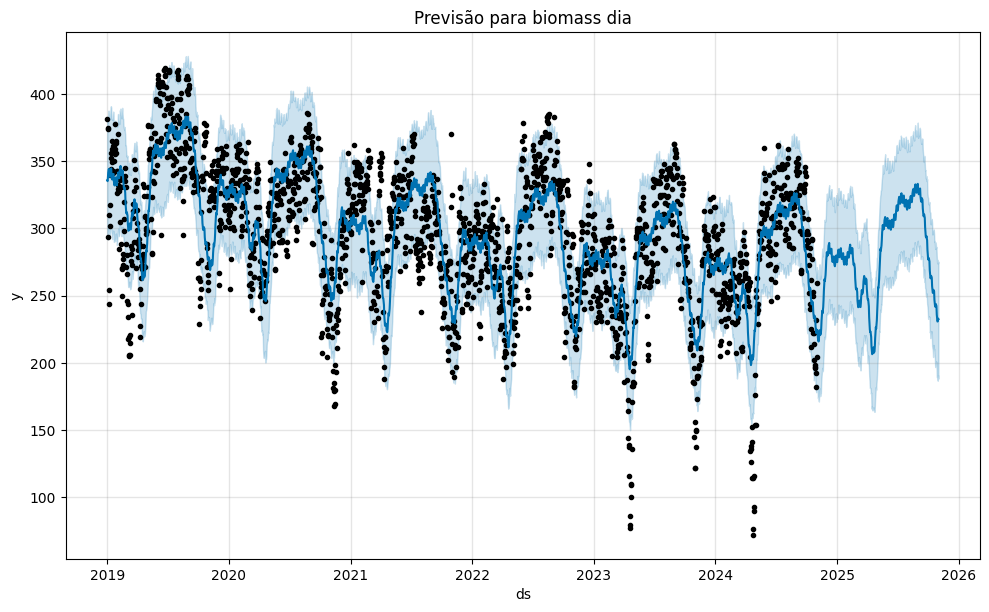

Carregando modelo de ../ml_models/biomass/prophet_mes.joblib...
Plotando previsão para mes...


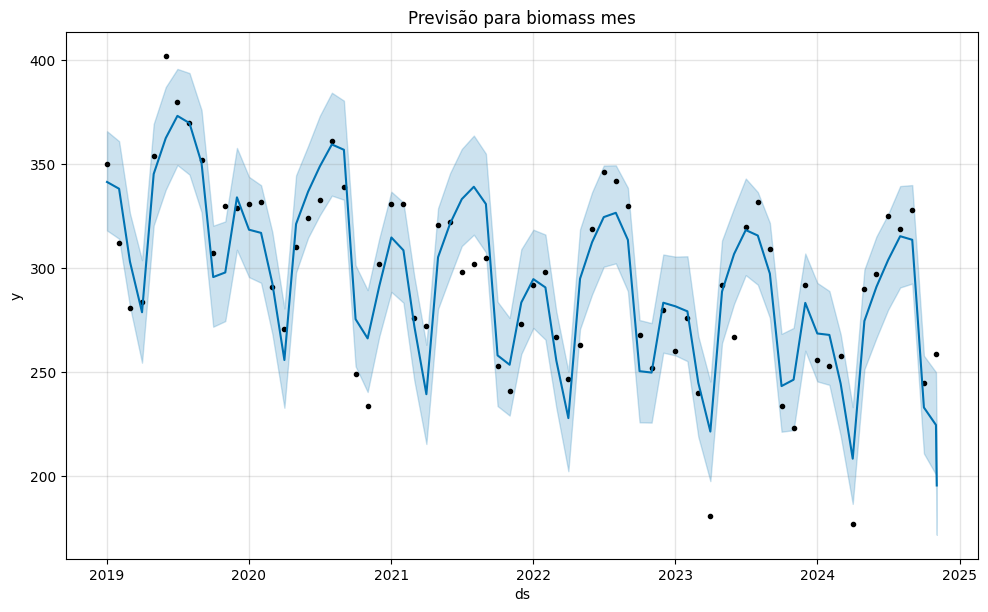

Carregando modelo de ../ml_models/biogas/prophet_hora.joblib...
Plotando previsão para hora...


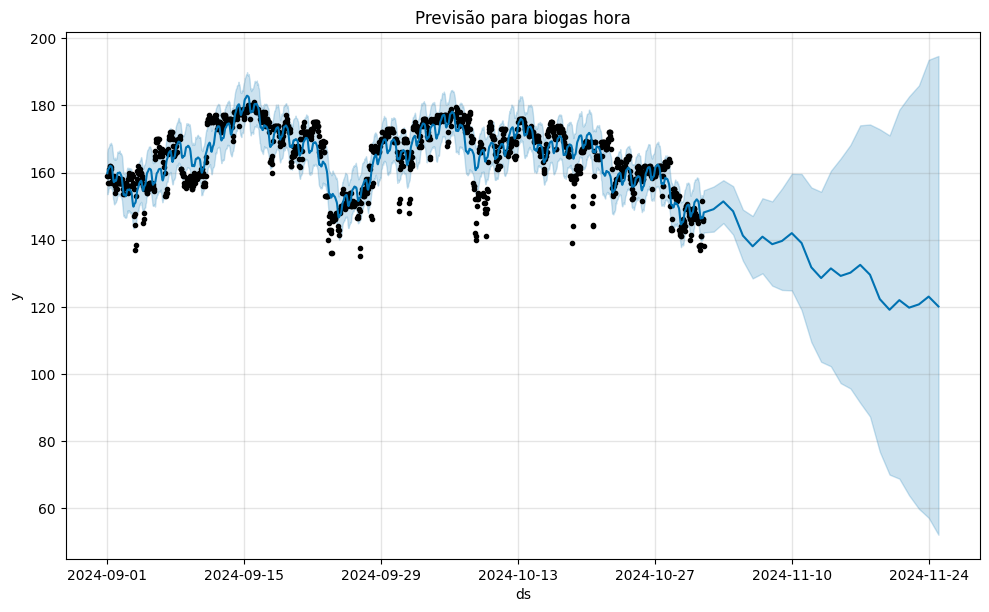

Carregando modelo de ../ml_models/biogas/prophet_dia.joblib...
Plotando previsão para dia...


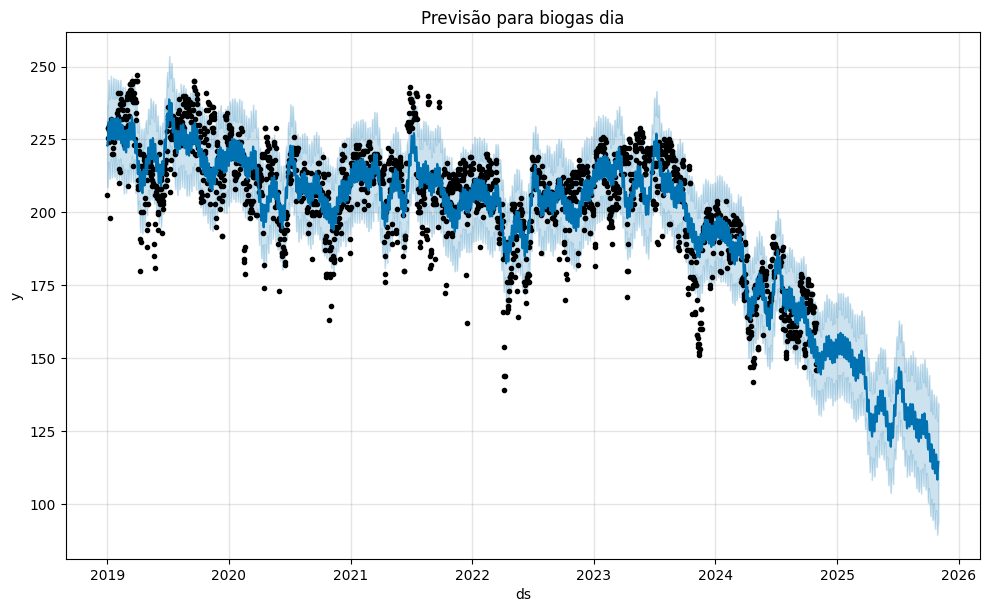

Carregando modelo de ../ml_models/biogas/prophet_mes.joblib...
Plotando previsão para mes...


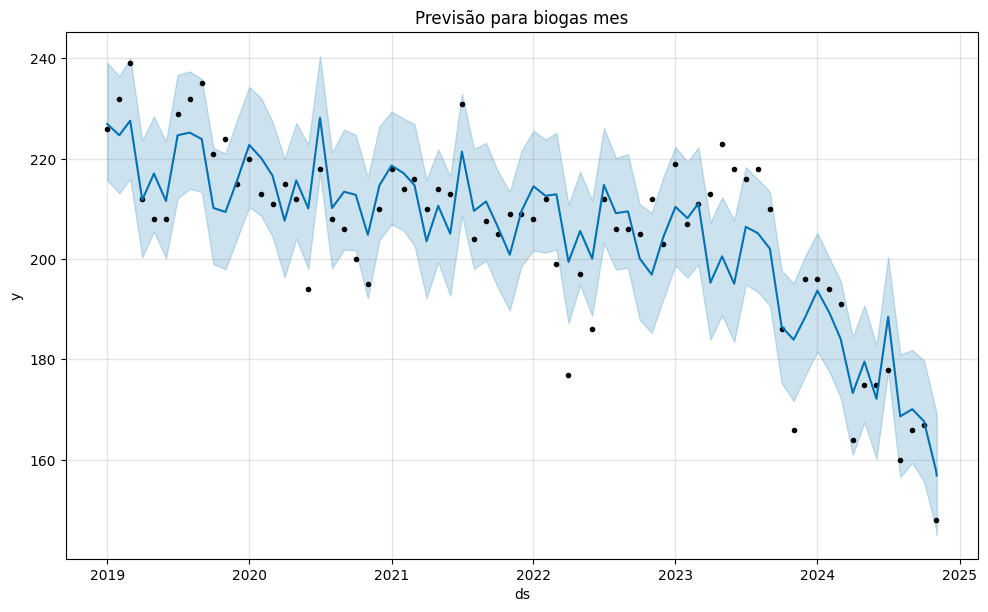

Carregando modelo de ../ml_models/small_hydro/prophet_hora.joblib...
Plotando previsão para hora...


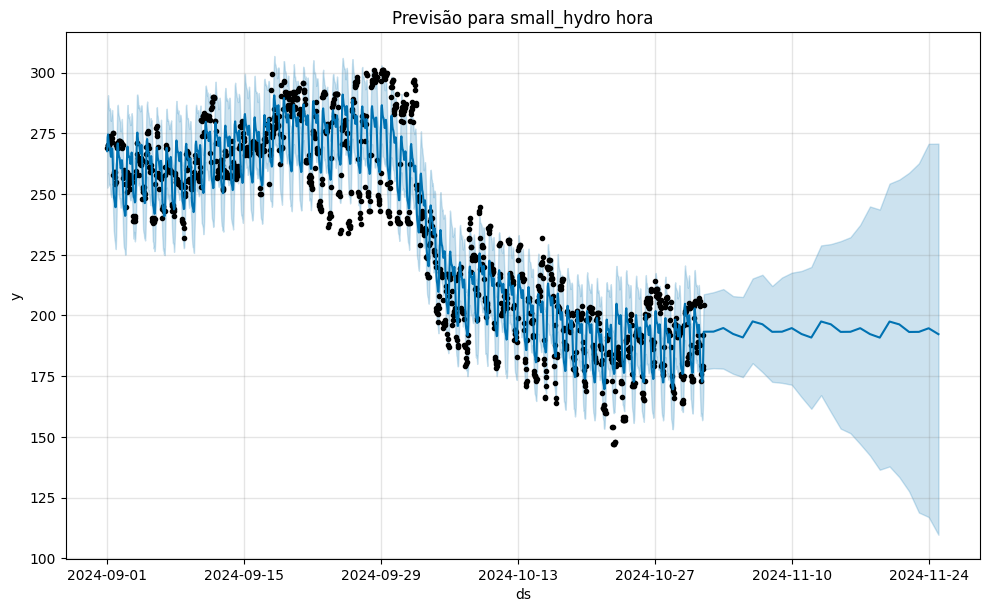

Carregando modelo de ../ml_models/small_hydro/prophet_dia.joblib...
Plotando previsão para dia...


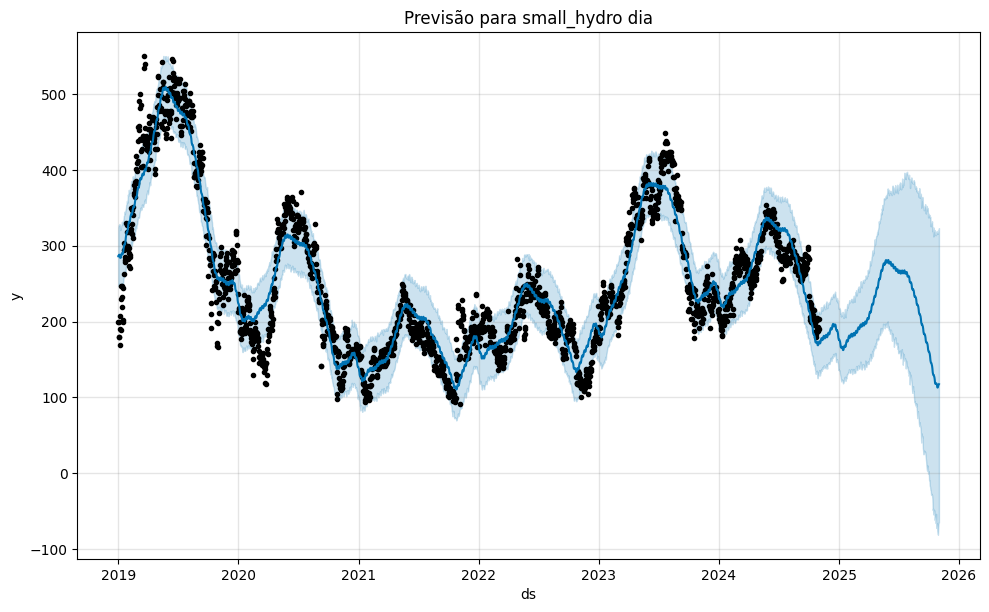

Carregando modelo de ../ml_models/small_hydro/prophet_mes.joblib...
Plotando previsão para mes...


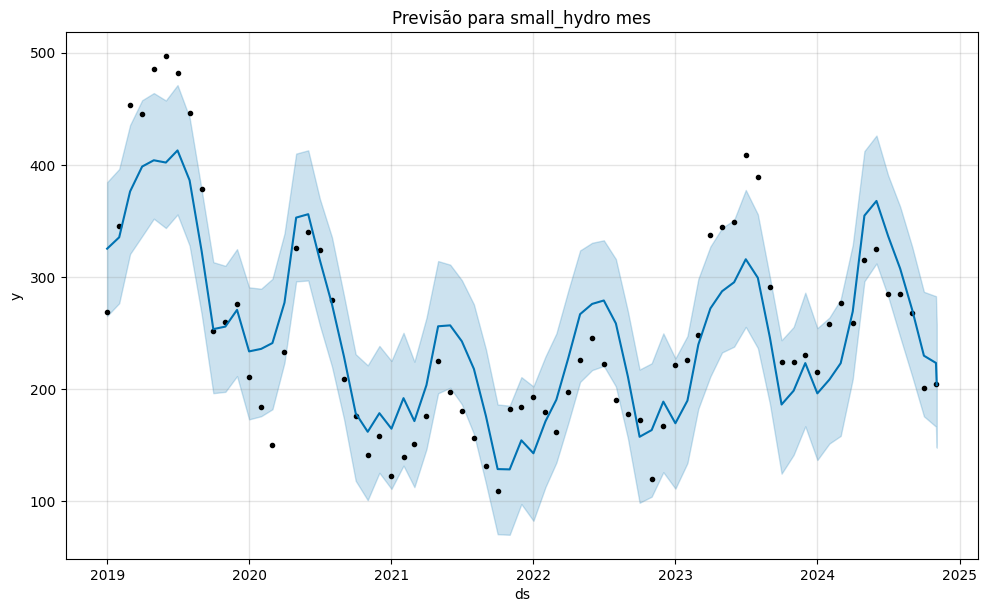

Carregando modelo de ../ml_models/coal/prophet_hora.joblib...
Plotando previsão para hora...


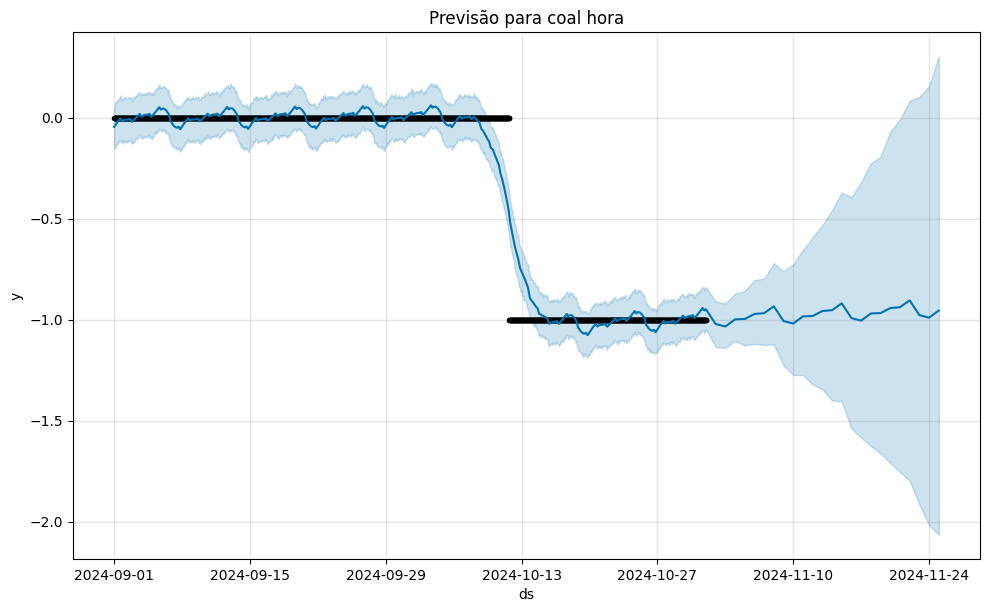

Carregando modelo de ../ml_models/coal/prophet_dia.joblib...
Plotando previsão para dia...


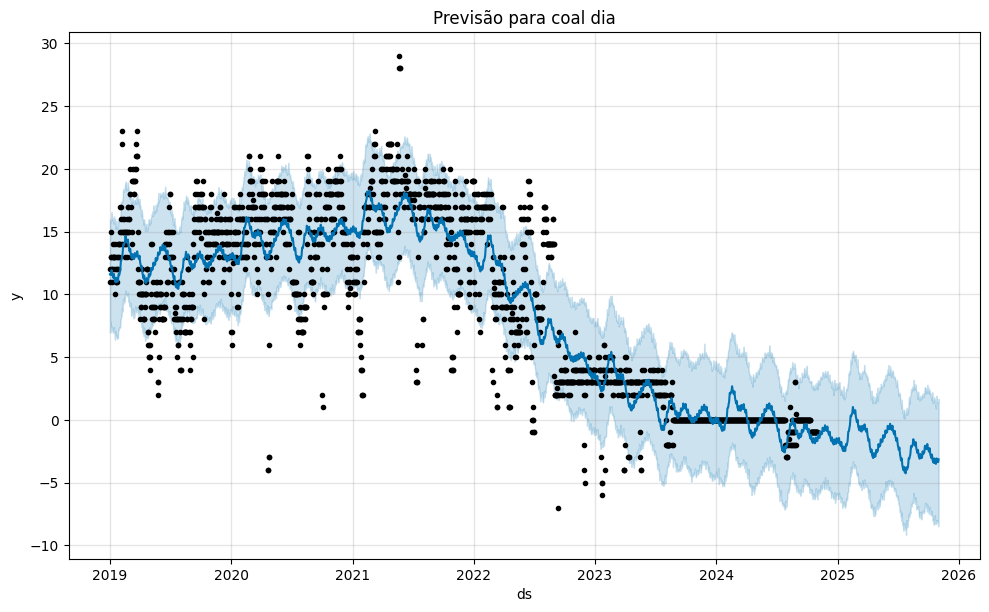

Carregando modelo de ../ml_models/coal/prophet_mes.joblib...
Plotando previsão para mes...


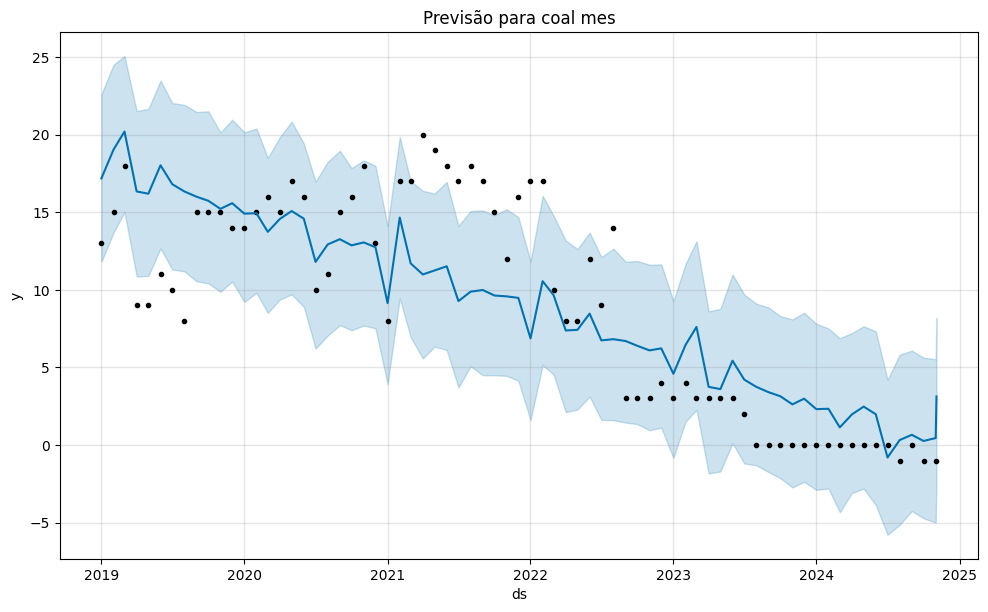

Carregando modelo de ../ml_models/nuclear/prophet_hora.joblib...
Plotando previsão para hora...


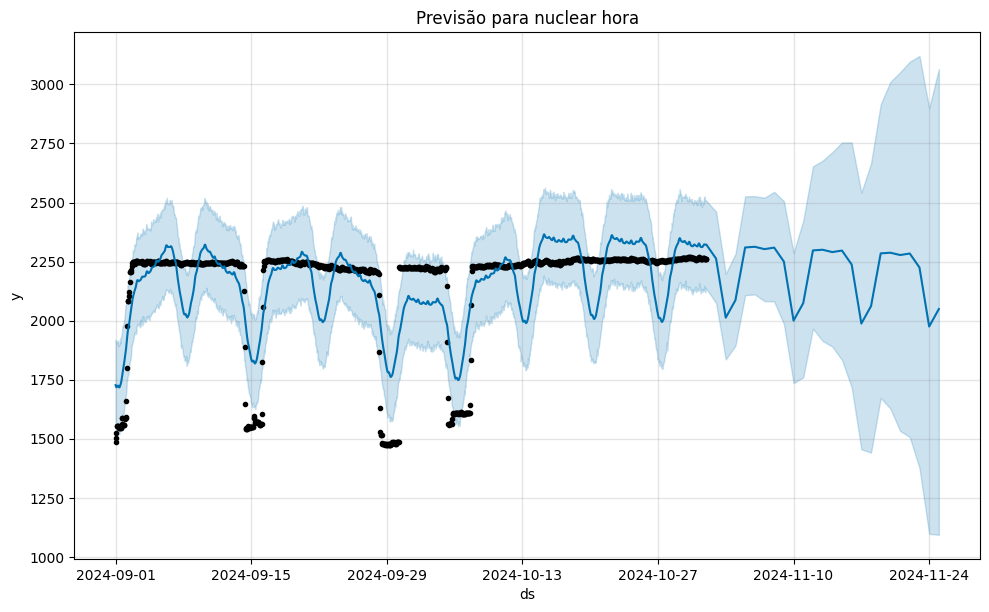

Carregando modelo de ../ml_models/nuclear/prophet_dia.joblib...
Plotando previsão para dia...


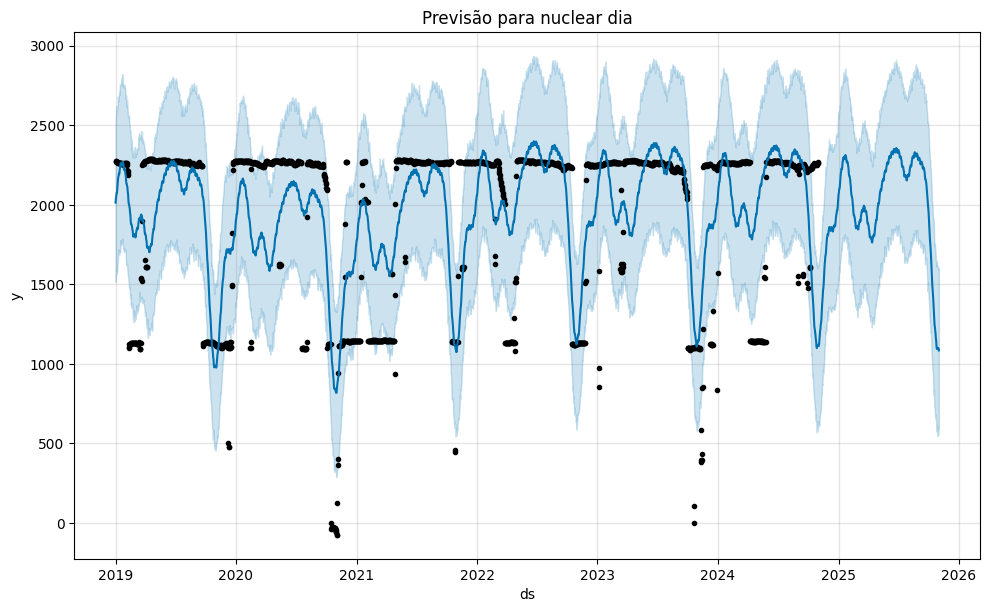

Carregando modelo de ../ml_models/nuclear/prophet_mes.joblib...
Plotando previsão para mes...


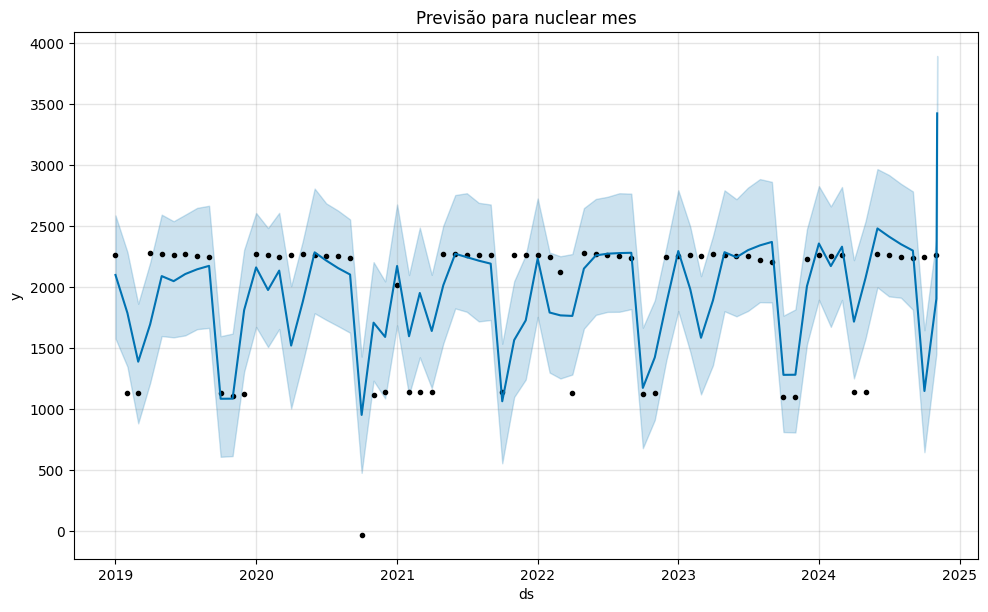

Carregando modelo de ../ml_models/natural_gas/prophet_hora.joblib...
Plotando previsão para hora...


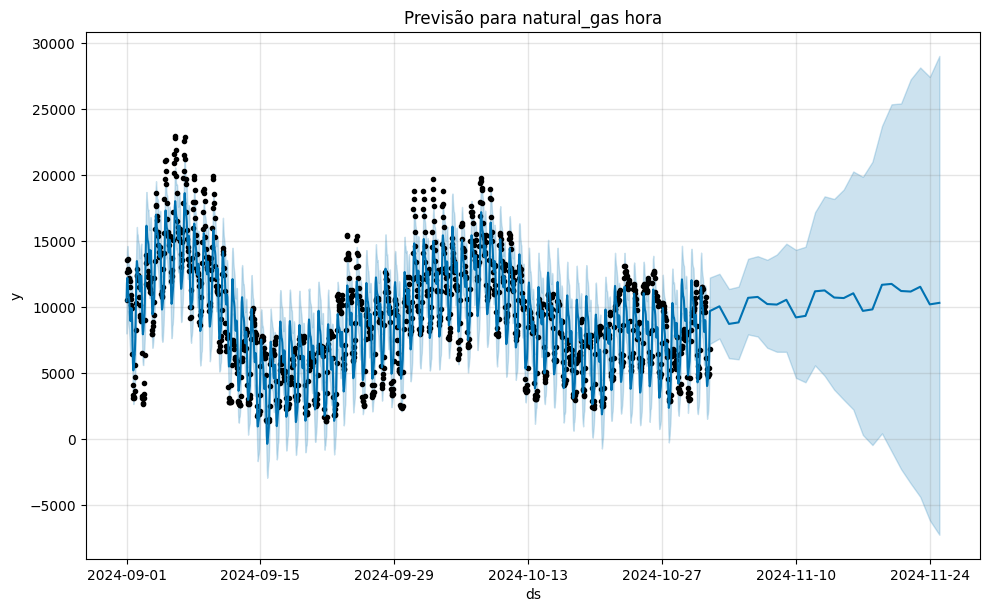

Carregando modelo de ../ml_models/natural_gas/prophet_dia.joblib...
Plotando previsão para dia...


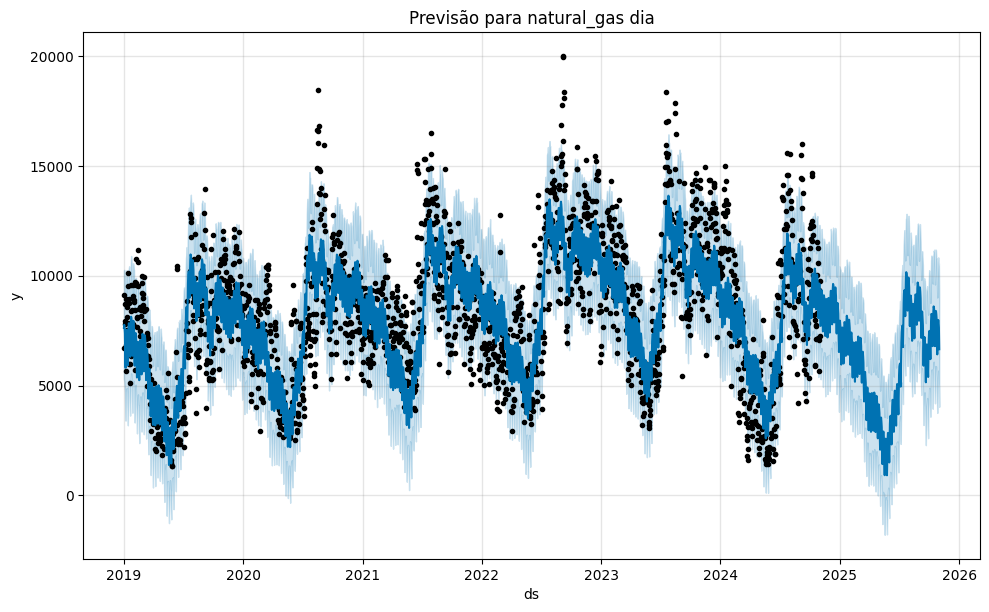

Carregando modelo de ../ml_models/natural_gas/prophet_mes.joblib...
Plotando previsão para mes...


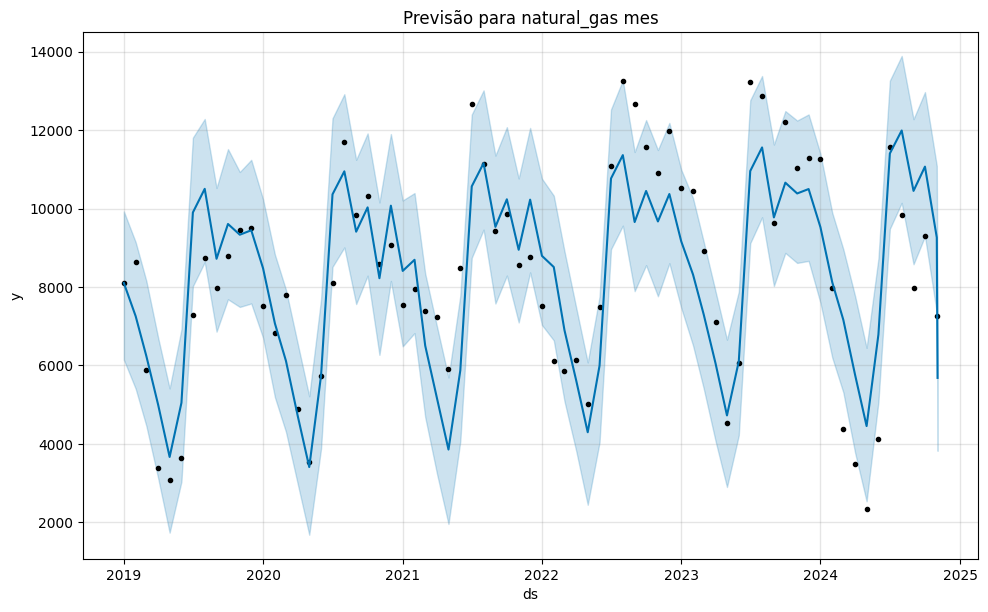

Carregando modelo de ../ml_models/large_hydro/prophet_hora.joblib...
Plotando previsão para hora...


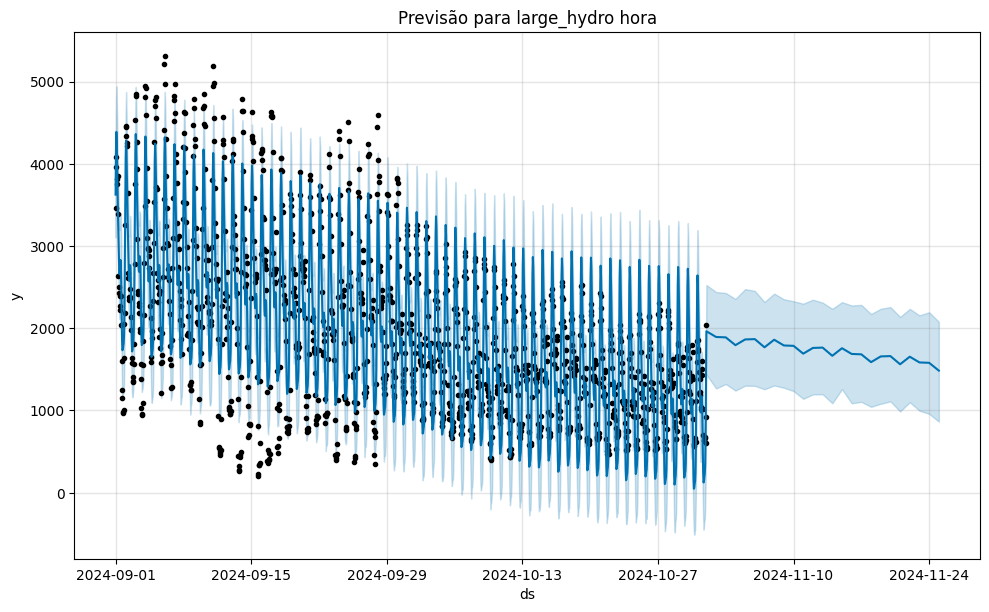

Carregando modelo de ../ml_models/large_hydro/prophet_dia.joblib...
Plotando previsão para dia...


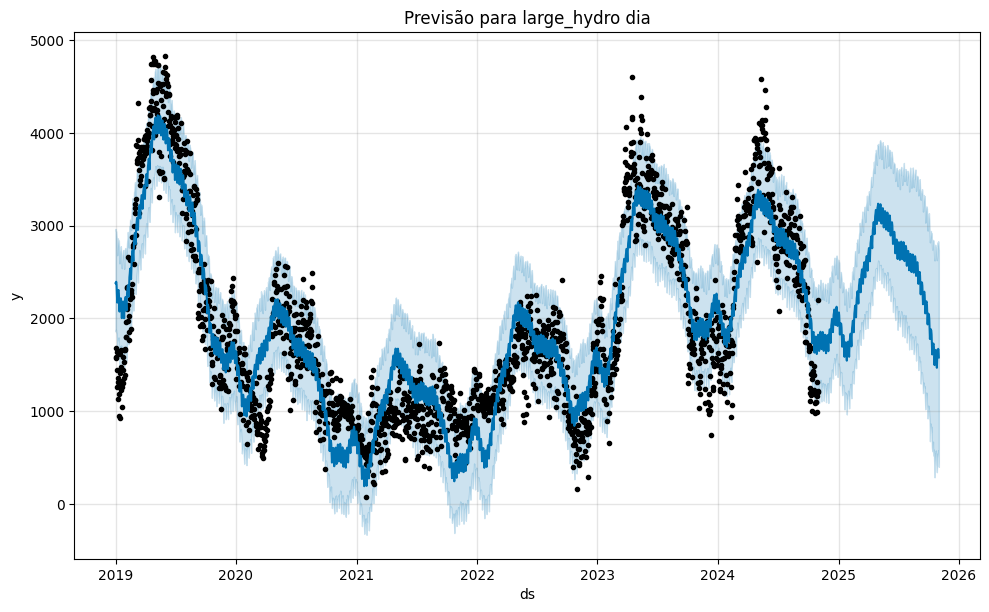

Carregando modelo de ../ml_models/large_hydro/prophet_mes.joblib...
Plotando previsão para mes...


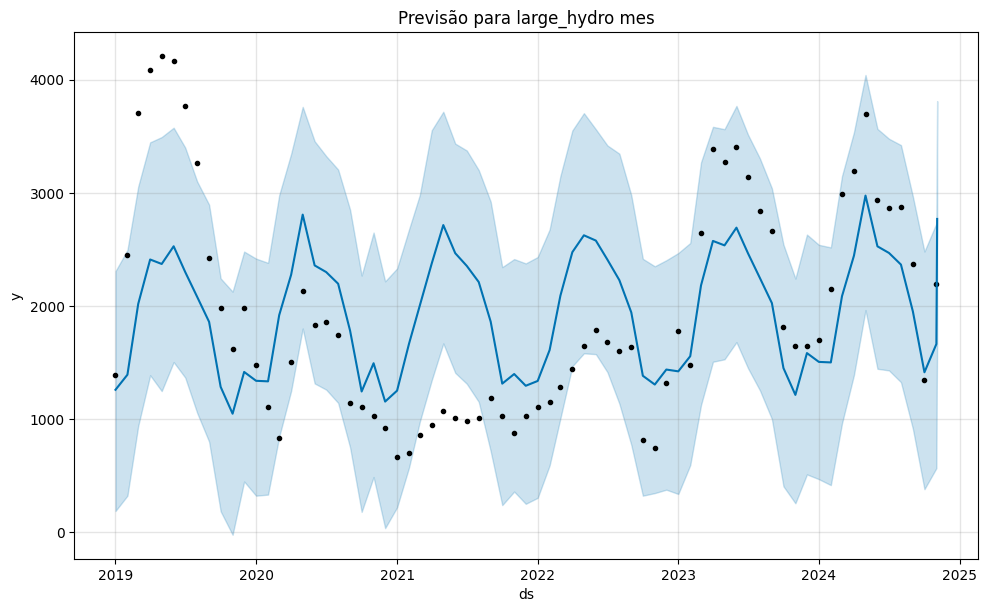

Carregando modelo de ../ml_models/batteries/prophet_hora.joblib...
Plotando previsão para hora...


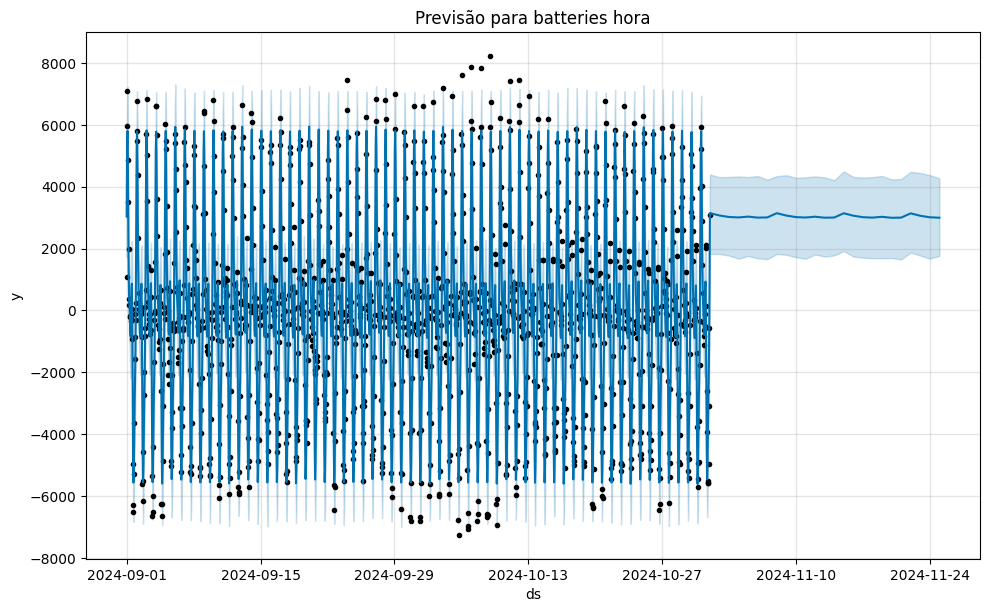

Carregando modelo de ../ml_models/batteries/prophet_dia.joblib...
Plotando previsão para dia...


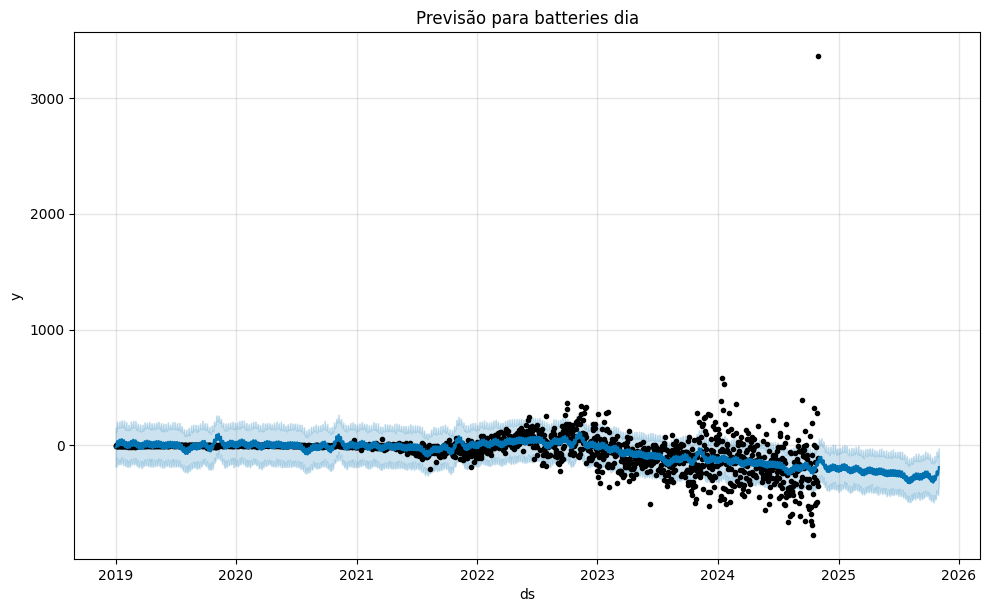

Carregando modelo de ../ml_models/batteries/prophet_mes.joblib...
Plotando previsão para mes...


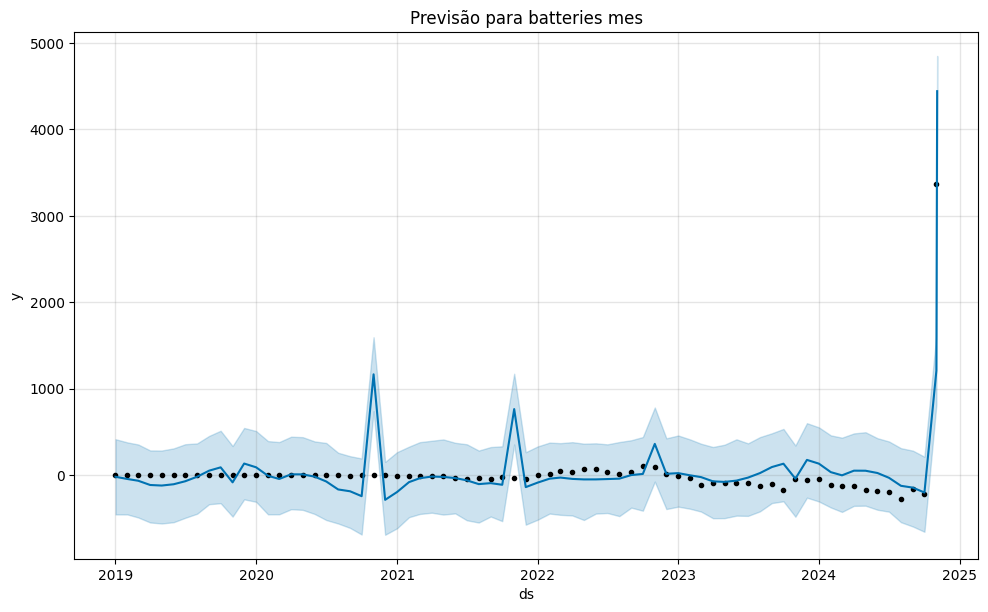

Carregando modelo de ../ml_models/imports/prophet_hora.joblib...
Plotando previsão para hora...


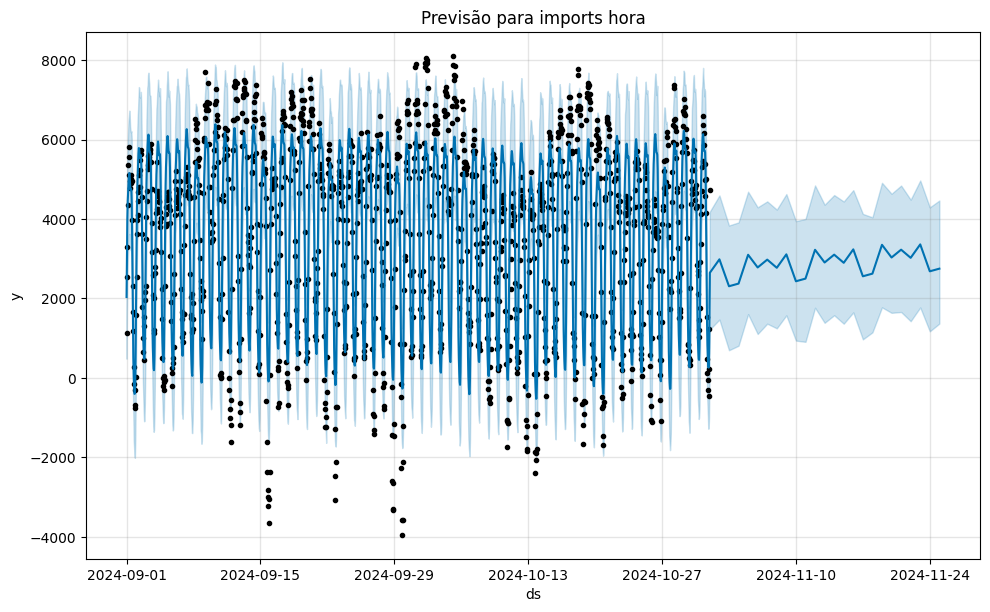

Carregando modelo de ../ml_models/imports/prophet_dia.joblib...
Plotando previsão para dia...


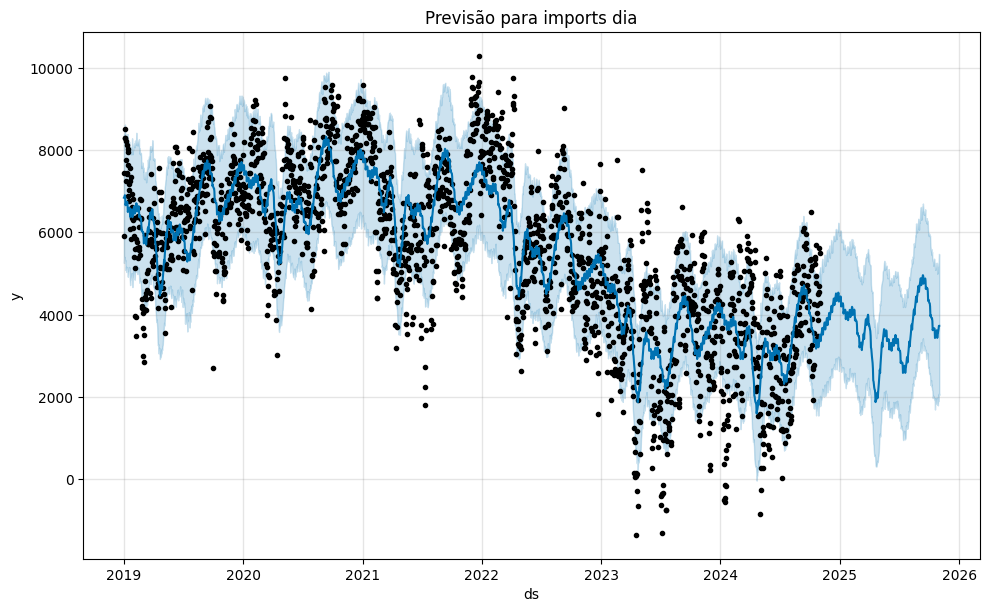

Carregando modelo de ../ml_models/imports/prophet_mes.joblib...
Plotando previsão para mes...


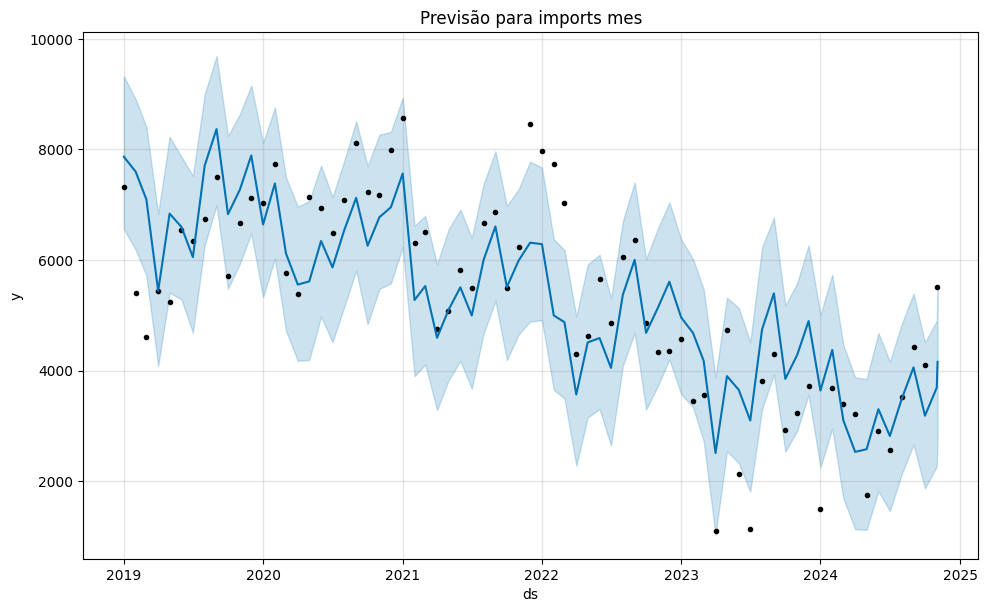

In [2]:
import matplotlib.pyplot as plt

energias = ['solar', 'wind',
       'geothermal', 'biomass', 'biogas', 'small_hydro', 'coal', 'nuclear',
       'natural_gas', 'large_hydro', 'batteries', 'imports', ]


for energy_type in energias:
    for periodo, config in frequencias.items():
        base_path_model = f"../ml_models/{energy_type}/"
        model_path = f"prophet_{periodo}.joblib"
        model = carregar_modelo( base_path_model + model_path,)
        
        forecast = prever(model, config['periods'])
        print(f"Plotando previsão para {periodo}...")
        fig = model.plot(forecast)
        plt.title(f"Previsão para {energy_type} {periodo}")
        plt.show()